In [13]:
import numpy as np

from sklearn.ensemble import AdaBoostClassifier

from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
X = np.arange(10).reshape(-1,1)
y = np.array([1,1,1,-1,-1,-1,1,1,1,-1])
display(X,y)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [29]:
ada = AdaBoostClassifier(n_estimators=3,algorithm='SAMME')
ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=3, random_state=None)

In [12]:
ada.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=440226938, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1727326647, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impur

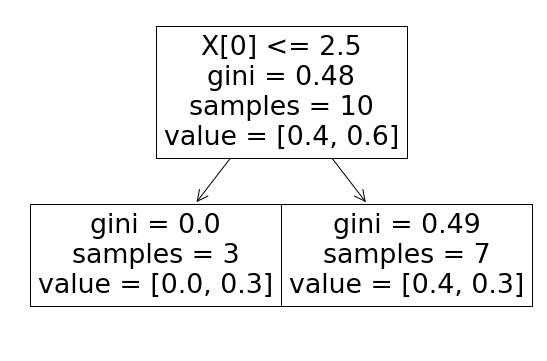

In [30]:
plt.figure(figsize=(9,6))
_ = tree.plot_tree(ada[0])

In [17]:
y_ = ada[0].predict(X)
y_

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

In [21]:
# 误差率
e1 = np.round(0.1*(y != y_).sum(),4)
e1

0.3

In [20]:
# 计算第一颗树权重
# 随机森林中每棵树的权重一样的
# adaboost提升树中每棵树的权重不同
a1 = np.round(1/2*np.log((1-e1)/e1),4)
a1

0.4236

$$w * e^{-a_j * y * \hat{y}}$$

In [26]:
# 样本预测准确：更新的权重
w2 = 0.1*np.e**(-a1*y*y_)
w2 = w2/w2.sum()
w2 = w2.round(4)
w2

array([0.0714, 0.0714, 0.0714, 0.0714, 0.0714, 0.0714, 0.1667, 0.1667,
       0.1667, 0.0714])

In [ ]:
# 分类函数f1(x)= a1*G1(x) = 0.4236G1(x)

In [32]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [28]:
y

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

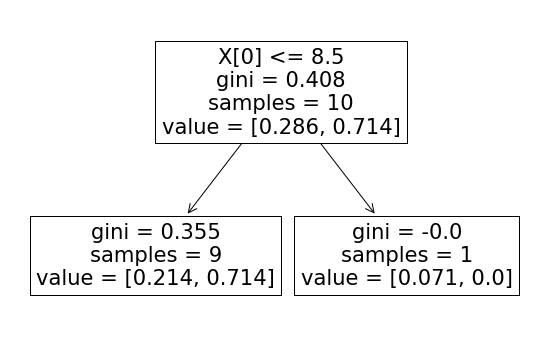

In [31]:
plt.figure(figsize=(9,6))
_ = tree.plot_tree(ada[1])

In [35]:
# 计算误差率
e2 = 0.0715*3
e2

0.21449999999999997

In [36]:
a2 = np.round(1/2*np.log((1 - e2)/e2),4)
a2

0.649

In [37]:
y_ = ada[1].predict(X)
w3 = w2*np.e**(-a2*y*y_)
w3 = w3/w3.sum()
w3 = w3.round(4)
w3

array([0.0455, 0.0455, 0.0455, 0.1665, 0.1665, 0.1665, 0.1062, 0.1062,
       0.1062, 0.0455])

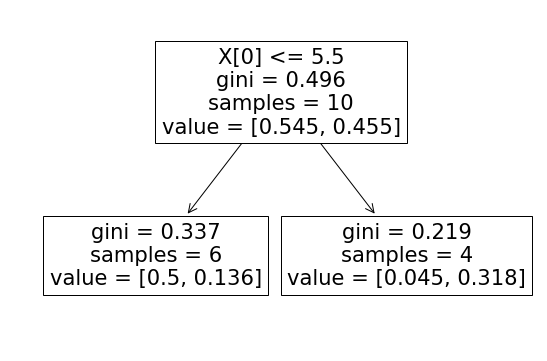

In [39]:
plt.figure(figsize=(9,6))
_ = tree.plot_tree(ada[2])

In [46]:
y_ = ada[2].predict(X)
y_

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1])

In [47]:
y

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [51]:
e3 = (w3*(y_ != y)).sum()

In [52]:
a3 = 1/2*np.log((1 - e3)/e3)
a3

0.7514278247629759

In [53]:
display(a1,a2,a3)

0.4236

0.649

0.7514278247629759

In [ ]:
# 弱分类器合并成强分类器
# 加和

$$sign(\sum_{i=1}^N{a_1*G1(x) + a_2*G2(x) + …… + a_n*Gn(x)})$$

In [ ]:
综上，将上面计算得到的a1、a2、a3各值代入G(x)中，
    G(x) = sign[f3(x)] = sign[ a1 * G1(x) + a2 * G2(x) + a3 * G3(x) ]，
    
得到最终的分类器为：
# sign意思负号函数，大于等于0变成1，小于0变成-1
G(x) = sign[f3(x)] = sign[ 0.4236G1(x) + 0.6496G2(x)+0.7514G3(x) ]。

In [54]:
# 集成树
ada.predict(X)

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [55]:
y_predict = a1*ada[0].predict(X) + a2*ada[1].predict(X) + a3*ada[2].predict(X)
y_predict

array([ 0.32117218,  0.32117218,  0.32117218, -0.52602782, -0.52602782,
       -0.52602782,  0.97682782,  0.97682782,  0.97682782, -0.32117218])

In [57]:
np.sign(y_predict).astype(np.int)

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])